<a href="https://colab.research.google.com/github/evansemet/Multi_Strategy_Sudoku/blob/main/Multi_Strategy_Sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# z3 is not a library that is installed by default with Google Colab so it needs to be installed
!pip install z3-solver

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from z3 import *

In [76]:
# Going to have three different boards
# One considered easy, medium, and hard
# This will allow us to compare times of different strategies
# across different difficulties and see the differences


# Easy Board
boardEasy = np.array([[ 7, 6, 0, 0, 0, 0, 1, 8, 5],
                      [ 0, 0, 0, 0, 3, 0, 0, 6, 0],
                      [ 0, 2, 0, 0, 0, 0, 3, 0, 0],
                      [ 0, 0, 7, 3, 8, 0, 4, 0, 0],
                      [ 3, 9, 0, 0, 0, 5, 2, 1, 0],
                      [ 0, 0, 4, 9, 1, 0, 7, 5, 0],
                      [ 0, 7, 2, 0, 9, 0, 5, 0, 1],
                      [ 8, 0, 0, 5, 0, 7, 0, 4, 0],
                      [ 5, 4, 0, 1, 6, 0, 8, 0, 7]], dtype=int)


# Medium Board
boardMedium = np.array([[ 0, 0, 4, 6, 0, 0, 5, 1, 0],
                        [ 0, 0, 3, 0, 0, 0, 8, 0, 2],
                        [ 2, 0, 0, 8, 0, 0, 0, 9, 0],
                        [ 0, 0, 1, 0, 2, 8, 0, 4, 0],
                        [ 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [ 3, 0, 0, 4, 0, 0, 9, 0, 6],
                        [ 8, 3, 0, 1, 0, 0, 4, 0, 0],
                        [ 0, 0, 0, 0, 9, 0, 2, 0, 0],
                        [ 0, 0, 6, 0, 0, 0, 0, 0, 0]], dtype=int)


# Hard Board
boardHard = np.array([[ 0, 0, 0, 7, 0, 0, 0, 0, 0],
                      [ 0, 0, 2, 0, 0, 0, 3, 0, 0],
                      [ 4, 0, 0, 0, 5, 9, 0, 1, 0],
                      [ 0, 0, 0, 4, 0, 0, 0, 7, 0],
                      [ 0, 3, 0, 0, 7, 6, 1, 0, 0],
                      [ 6, 0, 0, 8, 0, 0, 0, 0, 0],
                      [ 9, 0, 0, 0, 6, 1, 0, 5, 0],
                      [ 0, 0, 0, 0, 0, 8, 0, 0, 0],
                      [ 0, 4, 0, 0, 0, 0, 0, 0, 9]], dtype=int)

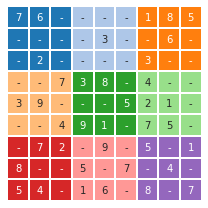

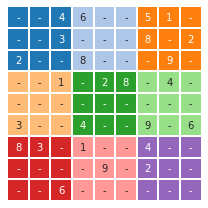

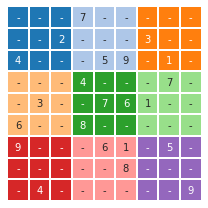

In [52]:
# Function to print the boards in a nice way
# Courtesy of Gareth Owen https://github.com/gowen100
def printBoard(board):
    x = np.ones((3,3))
    groups = np.block([[x*0,x*1,x*2], [x*3,x*4,x*5], [x*6,x*7,x*8]])
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    x = np.array(board.astype('int').astype('str'))
    x[x == "0"] = "-"
    ax = sns.heatmap(groups, annot=x, cbar=False, cmap="tab20", fmt="", vmin=0, vmax=19, linewidths=1, annot_kws={"size":10})
    ax.axis("off")    
    plt.tight_layout()
    plt.show()


# Printing out the boards from the beginning to show that 
printBoard(boardEasy)
print()
printBoard(boardMedium)
print()
printBoard(boardHard)

In [73]:
# Backtracking
# This solving method is going to just be a standard backtracking method


# Function that determines if a number can be placed in a
# certain row (r) or column (c)
def isValid(board, r, c, num):
  # makes sure that the row and column are within the confines of the board
  if r not in range(9) or c not in range(9):
    return False

  # checks to make sure unique in the row and column
  for i in range(9):
    if board[i][c] == num or board[r][i] == num:
      return False

  # checks to make sure unique in the 3x3 grid
  r = r // 3 * 3
  c = c // 3 * 3
  for i in range(r, r + 3):
    for j in range(c, c + 3):
      if board[i][j] == num:
        return False

  return True


# Finds the first empty grid in the board
# Returns the coordinate of the first empty grid
# If none are empty, it returns -1, -1
def findEmpty(board):
  for r in range(9):
    for c in range(9):
      if board[r][c] == 0:
        return r, c
  
  return -1, -1


# Function to solve the board
# Returns True if there is a valid solution
# otherwise, returns False
def solveBacktracking(board):
  r, c = findEmpty(board)
  if r == -1 and c == -1:
    printBoard(board)
    return True

  for num in range(1, 10):
    if isValid(board, r, c, num):
      board[r][c] = num
      if solveBacktracking(board) == True:
        return True
      else:
        # backtracking
        board[r][c] = 0

  return False

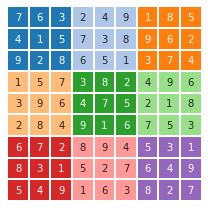

Easy solution found in 0.4456307888031006 seconds.



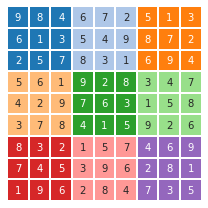

Medium solution found in 2.991603136062622 seconds.



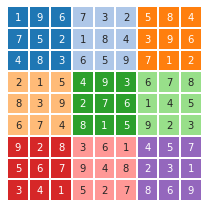

Hard solution found in 6.835436105728149 seconds.



In [74]:
# Just some code to output the solved grids along
# with how much time it took to solve each one


# Easy
startEasy = time.time()
if solveBacktracking(boardEasy) == True:
  print(f"Easy solution found in {time.time() - startEasy} seconds.")
else:
  print(f"No solution found for easy. Failed in {time.time() - startEasy} seconds.")
print()


# Medium
startMedium = time.time()
if solveBacktracking(boardMedium) == True:
  print(f"Medium solution found in {time.time() - startMedium} seconds.")
else:
  print(f"No solution found for medium. Failed in {time.time() - startMedium} seconds.")
print()


# Hard
startHard = time.time()
if solveBacktracking(boardHard) == True:
  print(f"Hard solution found in {time.time() - startHard} seconds.")
else:
  print(f"No solution found for hard. Failed in {time.time() - startHard} seconds.")
print()

In [75]:
# Z3
# This solving method takes advantage of Microsoft's Z3 library
# which is a SAT solver (boolean satisfiability solver)

def solveZ3(board):
    # Z3 can't work with integers so we need to remake the board
    X = np.array(IntVector('x', 9**2), dtype=object).reshape(9, 9)
    s = Tactic('default').solver()

    # makes sure that the numbers given in the puzzle stay there       
    s += [X[r][c] == int(e) for (r, c), e in np.ndenumerate(board) if e != 0]

    # makes sure that all numbers are from 1 to 9 and there are no
    # repeats in any column or row
    s += [And(i > 0, i < 10) for i in X.ravel()]
    s += [Distinct(list(X[i, :])) for i in range(9)]
    s += [Distinct(list(X[:, i])) for i in range(9)]

    # makes sure that there are no repeats in any 3 by 3 region
    x = np.ones((3,3))
    groups = np.block([[x*0,x*1,x*2], [x*3,x*4,x*5], [x*6,x*7,x*8]])
    s += [Distinct(list(X[groups == i].ravel())) for i in range(9)]
    
    if s.check() == sat:
        m = s.model()
        eval = np.vectorize(lambda x : m.evaluate(x))
        boardTemp = eval(X)
        # adds the solution to the original grid passed as a parameter
        for (r, c), e in np.ndenumerate(boardTemp):
          board[r][c] = str(e)
        return True
    else:
        return False

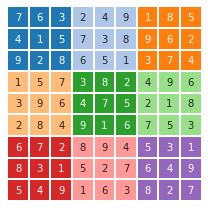

Easy solution found in 0.5443072319030762 seconds.



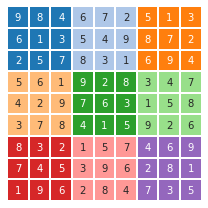

Medium solution found in 0.6390235424041748 seconds.



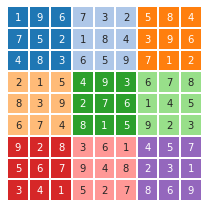

Hard solution found in 0.9134602546691895 seconds.



In [77]:
# Just some code to output the solved grids along
# with how much time it took to solve each one


# Easy
startEasy = time.time()
if solveZ3(boardEasy) == True:
  printBoard(boardEasy)
  print(f"Easy solution found in {time.time() - startEasy} seconds.")
else:
  print(f"No solution found for easy. Failed in {time.time() - startEasy} seconds.")
print()


# Medium
startMedium = time.time()
if solveZ3(boardMedium) == True:
  printBoard(boardMedium)
  print(f"Medium solution found in {time.time() - startMedium} seconds.")
else:
  print(f"No solution found for medium. Failed in {time.time() - startMedium} seconds.")
print()


# Hard
startHard = time.time()
if solveZ3(boardHard) == True:
  printBoard(boardHard)
  print(f"Hard solution found in {time.time() - startHard} seconds.")
else:
  print(f"No solution found for hard. Failed in {time.time() - startHard} seconds.")
print()